In [ ]:
import numpy as np
import cv2
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog

import pandas as pd
import numpy as np
import tensorflow as tf

import zipfile
import io

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten


In [ ]:
from google.colab import files

uploaded = files.upload()

# Make sure the uploaded file is named kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog -p /content


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 93% 203M/218M [00:01<00:00, 138MB/s]
100% 218M/218M [00:01<00:00, 125MB/s]


In [ ]:
zip_file_path = '/content/cat-and-dog.zip'

# Specify the directory to extract the dataset
extraction_path = '/content'

os.makedirs(extraction_path, exist_ok=True)

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
from PIL import Image
import os

# Function to process images in a directory
def process_images(directory, num_images=2):
    # Iterate through 'cats' and 'dogs' subdirectories
    for category in ['cats', 'dogs']:
        category_path = os.path.join(directory, category)

        # List all image files in the category subdirectory
        image_files = os.listdir(category_path)

        # Counter to track displayed images
        count = 0

        # Loop through each image file
        for file_name in image_files:
            if count >= num_images:
                break  # Stop processing images after reaching the specified limit

            # Construct the full path to the image file
            image_path = os.path.join(category_path, file_name)

            # Check if the file is a valid image file
            if not (file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png')):
                continue  # Skip non-image files

            try:
                # Open and load the image using PIL
                image = Image.open(image_path)

                # Display the image
                image.show()

                # Increment the counter
                count += 1

                # Optionally, convert the PIL image to numpy array for further processing
                image_array = np.array(image)
                # Process the image_array as needed

                # Close the image
                image.close()
            except (IOError, SyntaxError):
                # Handle any potential errors when opening or processing the image
                print(f"Error processing image: {image_path}")

# Process images in the 'train' directory
process_images('/content/training_set/training_set', num_images=2)

# Process images in the 'test' directory
process_images('/content/test_set/test_set', num_images=1)


# **1st method**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/training_set/training_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

testing_set = datagen.flow_from_directory(
        "/content/test_set/test_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your CNN model
cnn = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", strides=2, input_shape=[64, 64, 3]),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.summary()

In [ ]:
#cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# he use hinge in loss parametre
# sparse_categorical_crossentropy == 79% 20 epoches


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your CNN model
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define paths to your training and test directories
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

# Flow training images in batches using train_datagen
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Flow validation images in batches using test_datagen
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

# Fit the model
history = cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/15
251/251 [==============================] - 30s 101ms/step - loss: 0.6677 - accuracy: 0.5889 - val_loss: 0.5910 - val_accuracy: 0.6896
Epoch 2/15
251/251 [==============================] - 22s 89ms/step - loss: 0.6026 - accuracy: 0.6696 - val_loss: 0.5570 - val_accuracy: 0.7177
Epoch 3/15
251/251 [==============================] - 22s 87ms/step - loss: 0.5591 - accuracy: 0.7143 - val_loss: 0.5643 - val_accuracy: 0.7232
Epoch 4/15
251/251 [==============================] - 23s 93ms/step - loss: 0.5263 - accuracy: 0.7427 - val_loss: 0.6016 - val_accuracy: 0.6985
Epoch 5/15
251/251 [==============================] - 24s 94ms/step - loss: 0.5003 - accuracy: 0.7589 - val_loss: 0.4886 - val_accuracy: 0.7771
Epoch 6/15
251/251 [==============================] - 22s 89ms/step - loss: 0.4803 - accuracy: 0.7681 - val_loss: 0.5041 - val_accuracy: 0.7672
Epoch 7/15
251/251 [==============================]

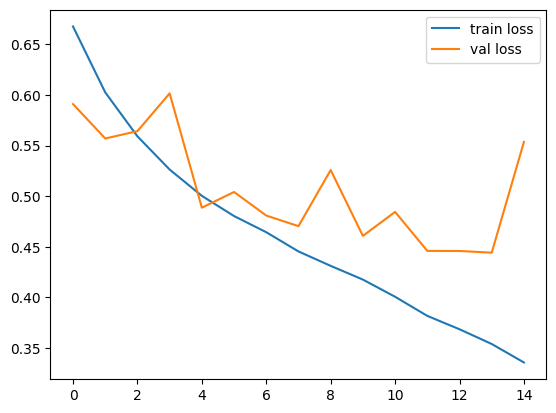

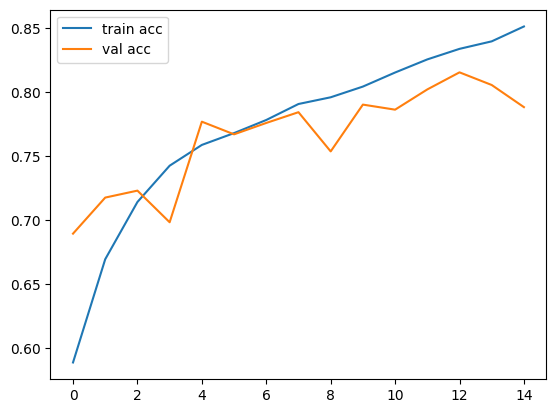

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**And now test a photos u want :**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the test image
test_image = image.load_img('/content/test_set/test_set/dogs/dog.4802.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0  # Normalize pixel values
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model (`cnn`) to predict the class probabilities
result = cnn.predict(test_image)

# Determine the predicted class
predicted_class_index = np.argmax(result[0])  # Get the index of the class with the highest probability

# Define class labels (assuming index 0 corresponds to 'cat' and index 1 corresponds to 'dog')
class_labels = ['cat', 'dog']

# Print the predicted class
predicted_class = class_labels[predicted_class_index]
print(f"The image is classified as: {predicted_class}")


# **2nd Method**

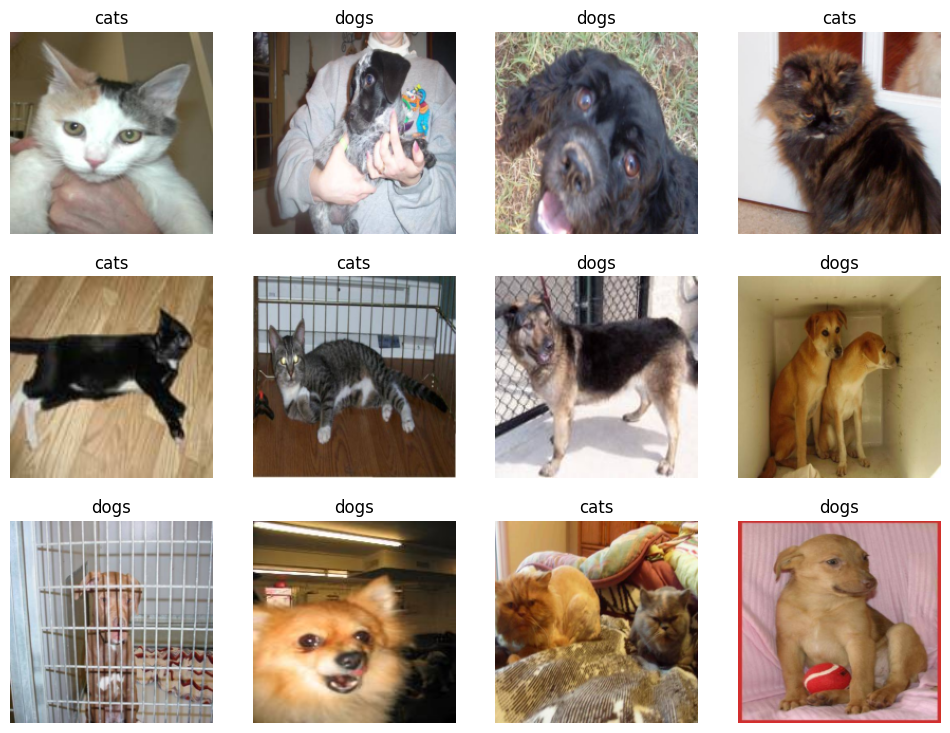

In [ ]:
from fastai.vision.all import *
import torch
torch.cuda.is_available()

train_path = '/content/training_set/training_set/'

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')],
).dataloaders(train_path, bs=64, device=torch.device('cuda'))

dls.show_batch(max_n=12)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.fine_tune(10)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.208367,0.099137,0.036852,0.963148,00:36


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.084944,0.065569,0.021237,0.978763,00:38
1,0.040388,0.051325,0.019988,0.980012,00:38
2,0.035454,0.084692,0.022486,0.977514,00:40
3,0.037202,0.071041,0.021861,0.978139,00:38
4,0.021587,0.047969,0.015615,0.984385,00:38
5,0.011116,0.058306,0.019363,0.980637,00:38
6,0.007795,0.052975,0.016240,0.983760,00:38
7,0.003712,0.051573,0.015615,0.984385,00:39
8,0.001110,0.053460,0.016864,0.983136,00:38
9,0.002845,0.051977,0.015615,0.984385,00:38


**Test the Model Sir :**

In [ ]:
from fastai.vision.all import *

# Load the saved model
#learn = load_learner("/content/export.pkl")  # Adjust the path if your model file is in a different directory

# Predict the class probabilities for the test image
_, _, probs = learn.predict("/content/test_set/test_set/cats/cat.4020.jpg")

# Display the prediction results
#print(int(probs))
print(f"Diagnosis: {'Cat' if float(probs[0]) >= 0.5 else 'Dog'}.")
print(f"The probability of Animal is: {probs[0]:.4f}")

Diagnosis: Cat.
The probability of Animal is: 1.0000


*Note : that 1.0 is sure Cats & 0.0 is sure Dogs*

save the model :

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')